In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score

In [48]:
card = pd.read_csv('fraudTest.csv')
card

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
card.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
from imblearn.over_sampling import SMOTE 

In [10]:
card = card.drop_duplicates()

In [13]:
card.fillna(card.mean(numeric_only=True), inplace=True)  # For numerical columns
card.fillna(card.mode().iloc[0], inplace=True) 

In [14]:
card['trans_date_trans_time'] = pd.to_datetime(card['trans_date_trans_time'])
card['hour'] = card['trans_date_trans_time'].dt.hour
card['day'] = card['trans_date_trans_time'].dt.day
card['month'] = card['trans_date_trans_time'].dt.month

In [16]:
# Remove the outliers from the amount
q1 = card['amt'].quantile(0.25)
q3 = card['amt'].quantile(0.75)
IQR = q3 - q1
card = card[(card['amt'] >= q1 - 1.5*IQR) & (card['amt'] <= q3 + 1.5*IQR)]

In [18]:
categorical_cols = ['category', 'gender', 'state', 'job']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    card[col] = le.fit_transform(card[col])
    label_encoders[col] = le

In [20]:
features = ['amt', 'hour', 'day', 'month'] + categorical_cols  # Add more as needed
X = card[features]
Y = card['is_fraud']

In [21]:
scaler = StandardScaler()

numerical_cols = ['amt', 'hour', 'day', 'month']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

/tmp/ipykernel_2611/1325129339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [23]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

print(Y_resampled.value_counts())  

is_fraud
0    527409
1    527409
Name: count, dtype: int64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [43]:
model1 = LogisticRegression(random_state=39)
model1.fit(X_train, Y_train)

/home/hp/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,39
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
model1.score(X_train, Y_train)*100,model1.score(X_train,Y_train)*100

(72.11825475505572, 72.11825475505572)

In [37]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
model2.score(X_train, Y_train)*100,model2.score(X_train,Y_train)*100

(100.0, 100.0)

In [52]:
kf = KFold(n_splits = 4)
for train,test in kf.split(X,Y):
    print(train,test)

[131986 131987 131988 ... 527938 527939 527940] [     0      1      2 ... 131983 131984 131985]
[     0      1      2 ... 527938 527939 527940] [131986 131987 131988 ... 263968 263969 263970]
[     0      1      2 ... 527938 527939 527940] [263971 263972 263973 ... 395953 395954 395955]
[     0      1      2 ... 395953 395954 395955] [395956 395957 395958 ... 527938 527939 527940]


In [55]:
y_pred = model2.predict(X_test)

In [56]:
confusion_matrix(Y_test, y_pred)

array([[157905,    590],
       [   210, 157741]])

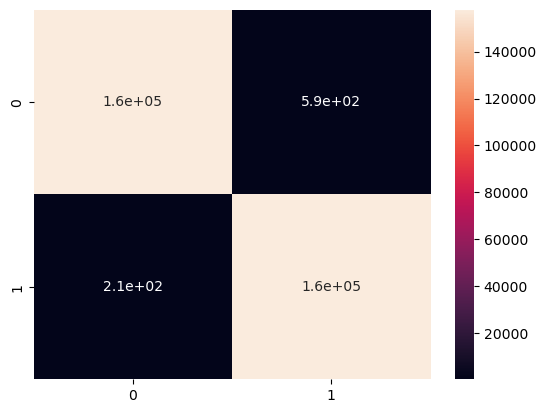

In [58]:
sns.heatmap(cf, annot = True)
plt.show()

In [59]:
model_list = [('LogisticRegression',LogisticRegression()),('DecisionTreeClassifier',DecisionTreeClassifier())]

In [61]:
main_model = VotingClassifier(model_list, weights = [10,5])
main_model.fit(X_train, Y_train)

/home/hp/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimators,"[('LogisticRegression', ...), ('DecisionTreeClassifier', ...)]"
,voting,'hard'
,weights,"[10, 5]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [65]:
main_model.score(X_train, Y_train)*100,main_model.score(X_train, Y_train)*100

(72.11825475505572, 72.11825475505572)

In [64]:
y_pred = main_model.predict(X_test)

In [66]:
cf = confusion_matrix(Y_test, y_pred)

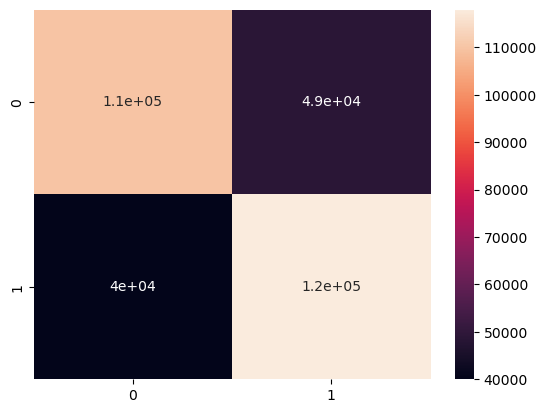

In [67]:
sns.heatmap(cf, annot = True)
plt.show()